In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
import seaborn as sns

In [5]:
# generating non normal data
np.random.seed(0)
df=np.random.exponential(size=1000,scale=2)
df=pd.DataFrame(df,columns=['values'])
df.head()

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


In [6]:
df.shape

(1000, 1)

<Axes: ylabel='Count'>

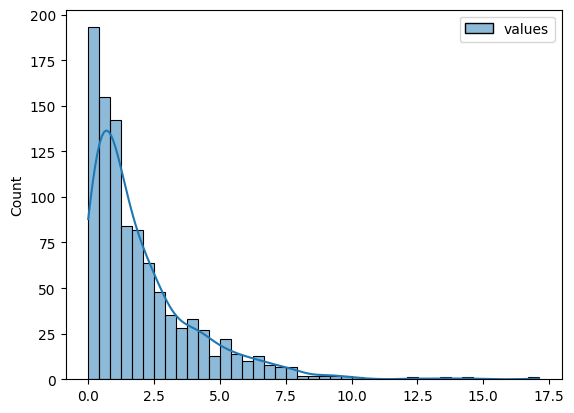

In [8]:
sns.histplot(df,kde=True)

In [11]:
pt_boxcox=PowerTransformer(method='box-cox')
#data must be positive for box cox
pt_yeo_johnson=PowerTransformer(method='yeo-johnson')

In [12]:
df['boc_cox']=pt_boxcox.fit_transform(df[['values']]+1)
df['yeo_johnson']=pt_yeo_johnson.fit_transform(df[['values']])

In [14]:
df


,values,boc_cox,yeo_johnson
0,1.591749,0.179335,0.179335
1,2.511862,0.677331,0.677331
2,1.846446,0.339698,0.339698
3,1.574402,0.167607,0.167607
4,1.102097,-0.202107,-0.202107
...,...,...,...
995,0.205564,-1.390405,-1.390405
996,1.446892,0.077828,0.077828
997,5.574577,1.527375,1.527375
998,0.519217,-0.862872,-0.862872


Text(0.5, 1.0, 'yeo-johnson')

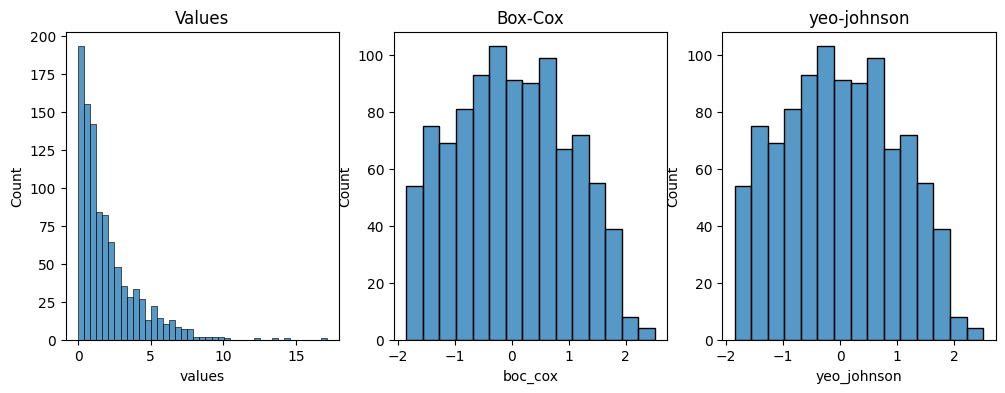

In [16]:
# prompt: Using dataframe df: using seaborn plot the histograms of values then box_cox and yeo_johnson

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the histogram of the values
sns.histplot(df['values'], ax=axes[0])
axes[0].set_title('Values')

# Plot the histogram of the box_cox transformed values
sns.histplot(df['boc_cox'], ax=axes[1])
axes[1].set_title('Box-Cox')

# Plot the histogram of the yeo_johnson transformed
sns.histplot(df['yeo_johnson'],ax=axes[2])
axes[2].set_title('yeo-johnson')

Text(0.5, 1.0, 'yeo-johnson')

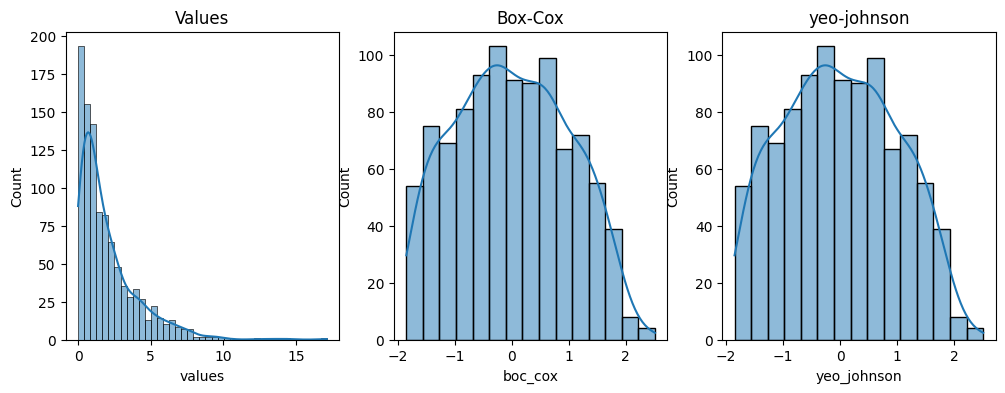

In [22]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the histogram of the values
sns.histplot(df['values'], ax=axes[0],kde=True)
axes[0].set_title('Values')

# Plot the histogram of the box_cox transformed values
sns.histplot(df['boc_cox'], ax=axes[1],kde=True)
axes[1].set_title('Box-Cox')

# Plot the histogram of the yeo_johnson transformed
sns.histplot(df['yeo_johnson'],ax=axes[2],kde=True)
axes[2].set_title('yeo-johnson')



Text(0.5, 1.0, 'Quantile')

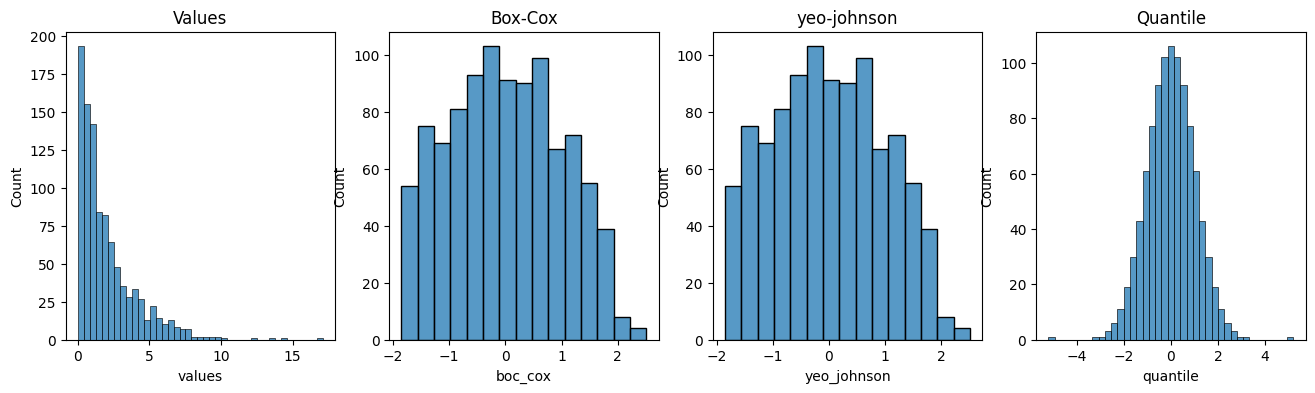

In [23]:
# prompt: transform the data of"values" using quantile transformer

from sklearn.preprocessing import QuantileTransformer

pt_quantile=QuantileTransformer(output_distribution='normal')
df['quantile']=pt_quantile.fit_transform(df[['values']])

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Plot the histogram of the values
sns.histplot(df['values'], ax=axes[0])
axes[0].set_title('Values')

# Plot the histogram of the box_cox transformed values
sns.histplot(df['boc_cox'], ax=axes[1])
axes[1].set_title('Box-Cox')

# Plot the histogram of the yeo_johnson transformed
sns.histplot(df['yeo_johnson'],ax=axes[2])
axes[2].set_title('yeo-johnson')

# Plot the histogram of the quantile transformed values
sns.histplot(df['quantile'], ax=axes[3])
axes[3].set_title('Quantile')

